In [87]:
import pandas as pd
import numpy as np
import glob
import ast

def parse_bpv_idx(val):
    if isinstance(val, tuple):
        return val
    elif isinstance(val, str):
        return tuple(map(int, ast.literal_eval(val.replace(" ", ","))))
    elif isinstance(val, list) or isinstance(val, np.ndarray):
        return tuple(val)
    else:
        raise ValueError(f"Unexpected type for bpv_idx: {type(val)}")


# Adjust the path as needed
parquet_files = glob.glob("/Users/darrenjian/Github/prompt-optimization/data/validation_scores/*_validation_score.parquet")
print("Parquet files found:", parquet_files)
all_scores = []
for path in parquet_files:
    df = pd.read_parquet(path)
    # Add a column indicating which base prompt this file belongs to
    df["bpv_idx"] = df["bpv_idx"].apply(lambda x: tuple(x) if isinstance(x, (list, np.ndarray)) else x)
    df["bp_idx"] = int(path.split("/")[-1].split("_")[0])
    all_scores.append(df)

# Combine all into one DataFrame

df_all = pd.concat(all_scores, ignore_index=True)
df_all = df_all.sort_values(by=["bp_idx", "bpv_idx"])
df_all[["bp_idx", "pv_idx"]] = df_all["bpv_idx"].apply(parse_bpv_idx).apply(pd.Series)
#df_all.to_csv("validation_scores.csv", index=False)
df_all.head()



Parquet files found: ['/Users/darrenjian/Github/prompt-optimization/data/validation_scores/2_validation_score.parquet', '/Users/darrenjian/Github/prompt-optimization/data/validation_scores/6_validation_score.parquet', '/Users/darrenjian/Github/prompt-optimization/data/validation_scores/7_validation_score.parquet', '/Users/darrenjian/Github/prompt-optimization/data/validation_scores/3_validation_score.parquet', '/Users/darrenjian/Github/prompt-optimization/data/validation_scores/9_validation_score.parquet', '/Users/darrenjian/Github/prompt-optimization/data/validation_scores/1_validation_score.parquet', '/Users/darrenjian/Github/prompt-optimization/data/validation_scores/5_validation_score.parquet', '/Users/darrenjian/Github/prompt-optimization/data/validation_scores/8_validation_score.parquet', '/Users/darrenjian/Github/prompt-optimization/data/validation_scores/4_validation_score.parquet', '/Users/darrenjian/Github/prompt-optimization/data/validation_scores/0_validation_score.parquet'

,bpv_idx,section_1,section_2,section_3,section_4,section_5,section_1_avg,section_2_avg,section_3_avg,section_4_avg,section_5_avg,total_score,bp_idx,pv_idx
99,"(0, -1)","[4, 5]","[4, 5]","[4, 4]","[4, 5]","[4, 4]",4.5,4.5,4.0,4.5,4.0,22.00,0,-1
100,"(0, 0)","[5, 5]","[4, 5]","[4, 4]","[5, 5]","[4, 4]",5.0,4.5,4.0,5.0,4.0,23.50,0,0
101,"(0, 1)","[4, 5]","[4, 5]","[3, 4]","[4, 5]","[4, 4]",4.5,4.5,3.5,4.5,4.0,21.75,0,1
102,"(0, 2)","[4, 5]","[4, 5]","[3, 4]","[4, 5]","[3, 4]",4.5,4.5,3.5,4.5,3.5,21.50,0,2
103,"(0, 3)","[4, 5]","[4, 5]","[3, 3]","[4, 5]","[4, 4]",4.5,4.5,3.0,4.5,4.0,21.50,0,3


/var/folders/5t/mw24vzhj1135_tydhxykwtyr0000gn/T/ipykernel_32655/712934624.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="bp_idx", y="total_score", data=df_all[df_all["pv_idx"] >= 0], palette="Set3")


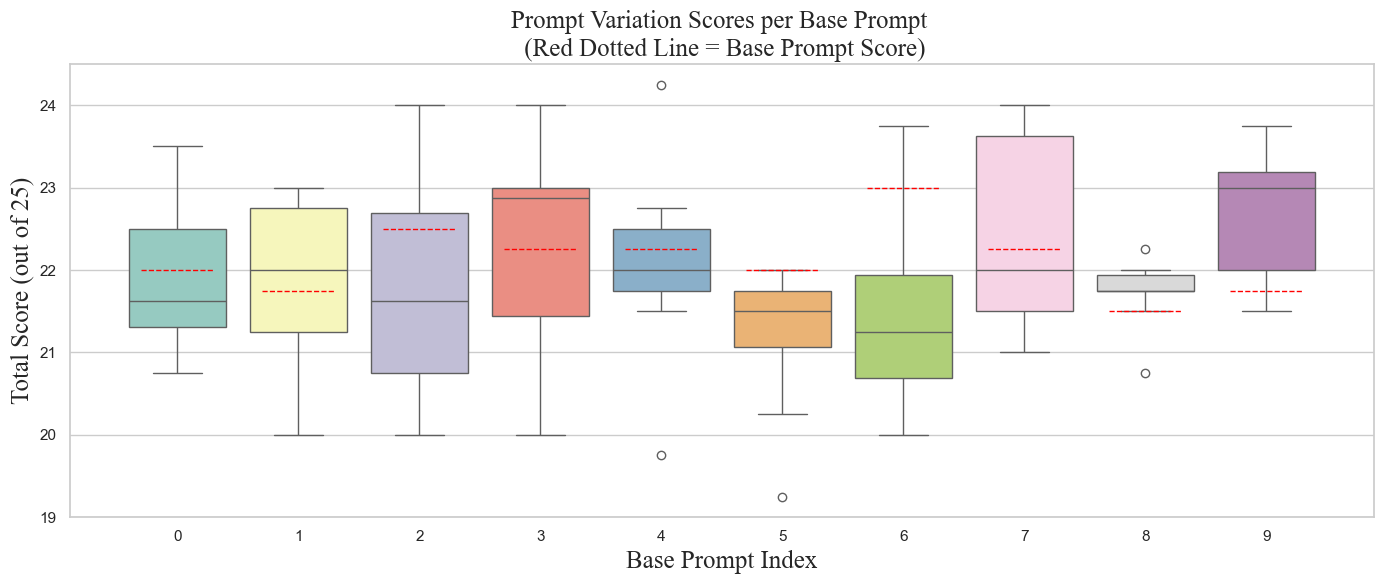

In [102]:
# Boxplot with dotted line for each base prompt
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_theme(style="whitegrid")
font = {'fontname':'Times New Roman',
        'size'   : 18}

# Create the boxplot
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x="bp_idx", y="total_score", data=df_all[df_all["pv_idx"] >= 0], palette="Set3")

# Get xtick positions to align dotted lines
xticks = ax.get_xticks()
xticklabels = [int(label.get_text()) for label in ax.get_xticklabels()]
base_scores = df_all[df_all["pv_idx"] == -1][["bp_idx", "total_score"]].set_index("bp_idx")["total_score"]

# Overlay a horizontal dotted line at the base prompt's score for each bp_idx
for tick, bp_idx in zip(xticks, xticklabels):
    if bp_idx in base_scores:
        score = base_scores[bp_idx]
        ax.plot([tick - 0.3, tick + 0.3], [score, score], linestyle="--", color="red", linewidth=1)

plt.title("Prompt Variation Scores per Base Prompt \n (Red Dotted Line = Base Prompt Score)", **font)
plt.xlabel("Base Prompt Index", **font)
plt.ylabel("Total Score (out of 25)", **font)
plt.tight_layout()
plt.show()


/var/folders/5t/mw24vzhj1135_tydhxykwtyr0000gn/T/ipykernel_32655/722798815.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="bp_idx", y="total_score", data=df_all[df_all["pv_idx"] >= 0], palette="Set3", inner="box")


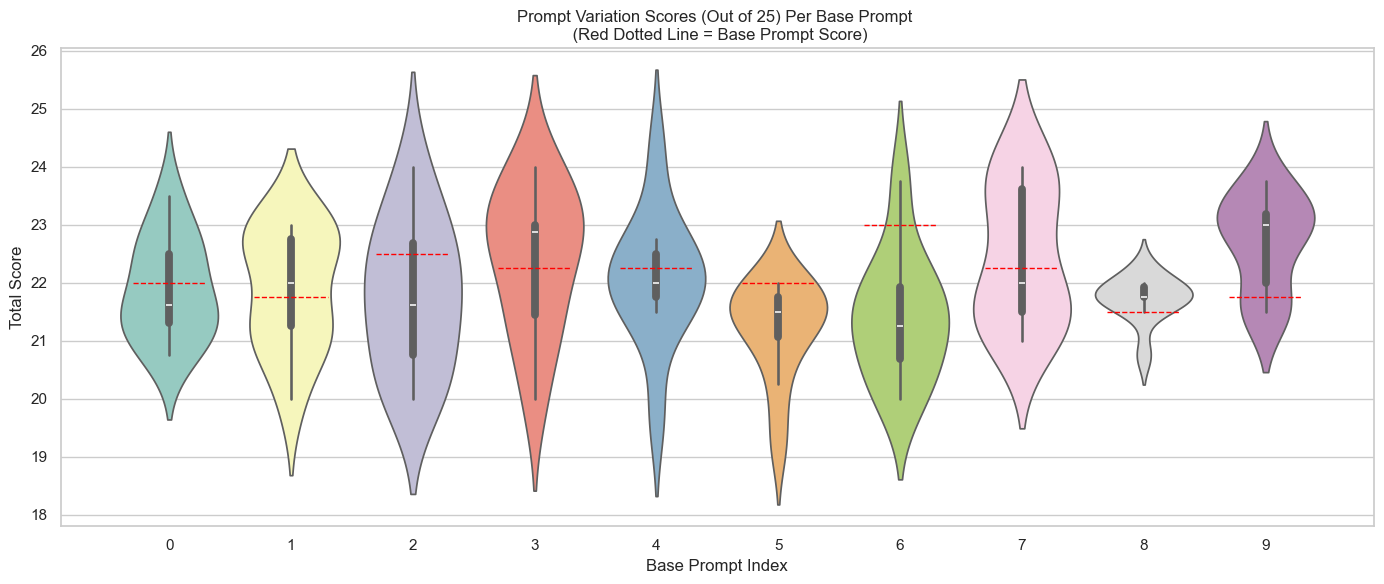

In [103]:
# Violin plot with dotted line for each base prompt
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_theme(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(14, 6))
ax = sns.violinplot(x="bp_idx", y="total_score", data=df_all[df_all["pv_idx"] >= 0], palette="Set3", inner="box")

# Get xtick positions to align dotted lines
xticks = ax.get_xticks()
xticklabels = [int(label.get_text()) for label in ax.get_xticklabels()]
base_scores = df_all[df_all["pv_idx"] == -1][["bp_idx", "total_score"]].set_index("bp_idx")["total_score"]

# Overlay a horizontal dotted line at the base prompt's score for each bp_idx
for tick, bp_idx in zip(xticks, xticklabels):
    if bp_idx in base_scores:
        score = base_scores[bp_idx]
        ax.plot([tick - 0.3, tick + 0.3], [score, score], linestyle="--", color="red", linewidth=1)

plt.title("Prompt Variation Scores (Out of 25) Per Base Prompt \n (Red Dotted Line = Base Prompt Score)")
plt.xlabel("Base Prompt Index")
plt.ylabel("Total Score")
plt.tight_layout()
plt.show()
